In [1]:
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageFont, ImageDraw
import random
from multiprocessing import Process
import gc
import sys
import pickle
import glob

In [2]:
def gen_one_img(image, text, idx):
    dr = ImageDraw.Draw(image)
    pianyix=random.randint(5,25)
    pianyiy=random.randint(1,10)
    font = fontarr[idx]
    dr.text((pianyix,pianyiy), text, font=font, fill="#000000")
    return image

In [3]:
def gen_text(length, cut_pdf_all_word, idx):
#     min(length, len(cut_pdf_all_word))
    output = list(cut_pdf_all_word[idx:idx+min(length, len(cut_pdf_all_word))-4])
    # 加两个随机生成的字符
    output += idx2word[random.randint(0, max_idx)]
    output += idx2word[random.randint(0, max_idx)]
    output += idx2word[random.randint(0, max_idx)]
    output += idx2word[random.randint(0, max_idx)]
    label = []
    for word in list(output):
        if word in word2idx:
            label.append(word2idx[word])
        else:
            output.remove(word)
    output = ''.join(output)
#     for i in range(length):
#         label.append(random.randint(0, len(wenziarr)-1))
#         output += idx2word[label[-1]]
    return output, label
def jiazaosheng(im,color,percent):
    width,height,_=im.shape
    for i in range(int(width*height*percent)):
        x=random.randint(0,width-1)
        y=random.randint(0,height-1)
        #print width,height,x,y
        im[x,y]=color
def cut_lines(img, jingxidu=50):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    y_sum = np.sum(gray, axis = 1)
    max_y = max(y_sum)
    min_y = min(y_sum)
    yuzhi = max_y - int((max_y - min_y) / jingxidu)
    start_y = []
    end_y = []
    for i in range(1, len(y_sum)):
        if y_sum[i] > yuzhi and y_sum[i-1] < yuzhi:
            end_y.append(i)
        if y_sum[i] < yuzhi and y_sum[i-1] > yuzhi:
            start_y.append(i)
    output = []
    if len(start_y) == len(end_y):
        for i in range(len(start_y)):
            output.append([start_y[i], end_y[i]])
    return output

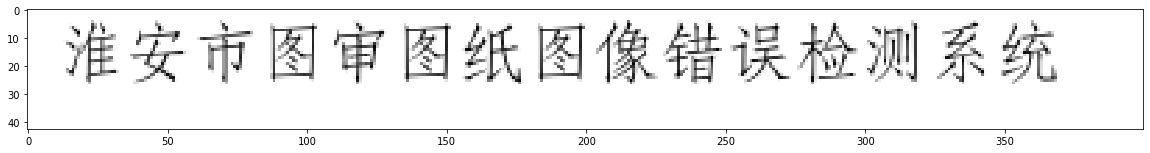

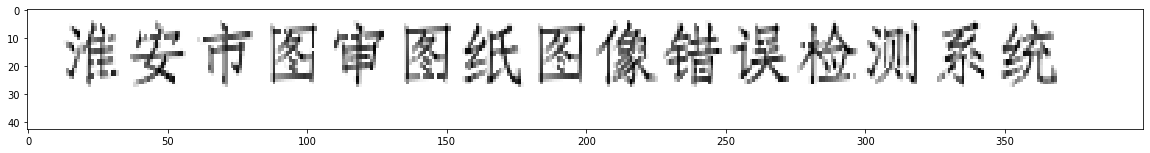

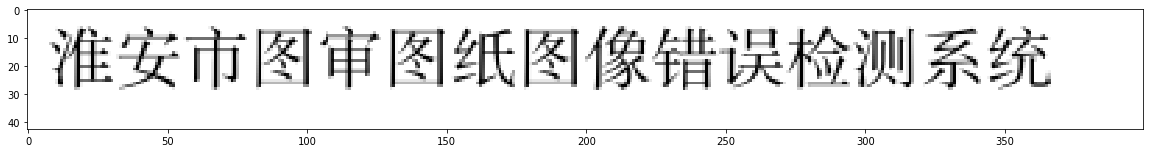

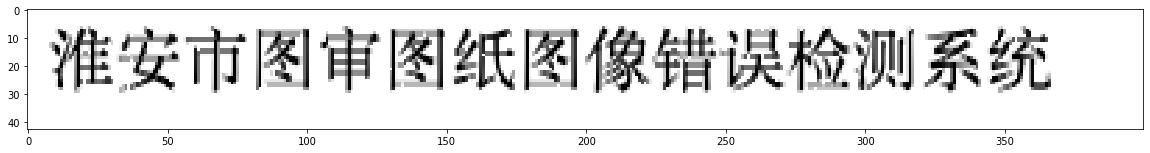

In [4]:
fontslist=glob.glob('../data/ttf/*')
fontarr=[]
for line in fontslist:
    if 'README' in line:
        continue
    fontarr.append(ImageFont.truetype(line.split('\n')[0], 24))
    image = Image.new("RGB", (400, 43), (255, 255, 255))
    image = gen_one_img(image, "淮安市图审图纸图像错误检测系统", -1)
    image = np.array(image)
    plt.figure(figsize=(20,5))
    plt.imshow(image)
    plt.show()
    jiazaosheng(image, (255, 255, 255), 0.05)
    image = cv2.erode(image, np.ones([2,1]), 1)
    plt.figure(figsize=(20,5))
    plt.imshow(image)
    plt.show()

In [5]:
wenziarr=[]
cut_zhuanzhe = lambda t: t.split('\n')[0]
wenziarr = list(map(cut_zhuanzhe, open('../data/最新字典3_只含常用字.csv',encoding='utf8').readlines()[0].split(',')))
# wenziarr.remove(wenziarr[0])
wenziarr.append(',')
word2idx = {}
idx2word = {}
word2idx[' '] = 0
idx2word[0] = ' '
for idx, word in enumerate(wenziarr):
    word2idx[wenziarr[idx]] = idx + 1
    idx2word[idx + 1] = wenziarr[idx]
print(len(word2idx),word2idx)
max_idx = 0
for idx in idx2word:
    if idx > max_idx:
        max_idx = idx

1804 {' ': 948, 'q': 1, 'w': 2, 'e': 3, 'r': 4, 't': 5, 'y': 6, 'u': 7, 'i': 8, 'o': 9, 'p': 10, 'a': 11, 's': 12, 'd': 13, 'f': 14, 'g': 15, 'h': 16, 'j': 17, 'k': 18, 'l': 19, 'z': 20, 'x': 21, 'c': 22, 'v': 23, 'b': 24, 'n': 25, 'm': 26, 'Q': 27, 'W': 28, 'E': 29, 'R': 30, 'T': 31, 'Y': 32, 'U': 33, 'I': 34, 'O': 35, 'P': 36, 'A': 37, 'S': 38, 'D': 39, 'F': 40, 'G': 41, 'H': 42, 'J': 43, 'K': 44, 'L': 45, 'Z': 46, 'X': 47, 'C': 48, 'V': 49, 'B': 50, 'N': 51, 'M': 52, '`': 53, '1': 54, '2': 55, '3': 56, '4': 57, '5': 58, '6': 59, '7': 60, '8': 61, '9': 62, '0': 63, '-': 64, '=': 65, '~': 66, '!': 67, '@': 68, '#': 69, '$': 70, '%': 71, '^': 72, '&': 73, '*': 74, '(': 75, ')': 76, '_': 77, '+': 78, '\\': 79, ']': 80, '[': 81, '{': 82, '}': 83, '|': 84, "'": 85, ';': 86, ':': 87, '"': 88, '.': 89, '/': 90, '<': 91, '>': 92, '《': 93, '》': 94, '?': 95, '': 96, '金': 97, '注': 98, '意': 99, '母': 100, '排': 101, '连': 102, '续': 103, '性': 104, '负': 105, '放': 106, '气': 107, '孔': 108, '轴': 109, '心

In [6]:
# 收集的文本数据
cut_pdf_all_word = '''一说起“深度学习”，自然就联想到它非常显著的特点“深、深、深”（重要的事说三遍），
通过很深层次的网络实现准确率非常高的图像识别、语音识别等能力。因此，我们自然很容易就想到：
深的网络一般会比浅的网络效果好，如果要进一步地提升模型的准确率，最直接的方法就是把网络设计得越深越好，
这样模型的准确率也就会越来越准确。那现实是这样吗？先看几个经典的图像识别深度学习模型：这几个模型都是在
世界顶级比赛中获奖的著名模型，然而，一看这些模型的网络层次数量，似乎让人很失望，少则5层，多的也就22层而已
，这些世界级模型的网络层级也没有那么深啊，这种也算深度学习吗？为什么不把网络层次加到成百上千层呢？带着这个
通过很深层次的网络实现准确率非常高的图像识别、语音识别等能力。因此，我们自然很容易就想到：
深的网络一般会比浅的网络效果好，如果要进一步地提升模型的准确率，最直接的方法就是把网络设计得越深越好，
这样模型的准确率也就会越来越准确。那现实是这样吗？先看几个经典的图像识别深度学习模型：这几个模型都是在
世界顶级比赛中获奖的著名模型，然而，一看这些模型的网络层次数量，似乎让人很失望，少则5层，多的也就22层而已
，这些世界级模型的网络层级也没有那么深啊，这种也算深度学习吗？为什么不把网络层次加到成百上千层呢？带着这个
通过很深层次的网络实现准确率非常高的图像识别、语音识别等能力。因此，我们自然很容易就想到：
深的网络一般会比浅的网络效果好，如果要进一步地提升模型的准确率，最直接的方法就是把网络设计得越深越好，
这样模型的准确率也就会越来越准确。那现实是这样吗？先看几个经典的图像识别深度学习模型：这几个模型都是在
世界顶级比赛中获奖的著名模型，然而，一看这些模型的网络层次数量，似乎让人很失望，少则5层，多的也就22层而已
，这些世界级模型的网络层级也没有那么深啊，这种也算深度学习吗？为什么不把网络层次加到成百上千层呢？带着这个
问题，我们先来看一个实验，对常规的网络（plainnetwork，也称平原网络）直接堆叠很多层次，经对图像识别结果
进行检验，训练集、测试集的误差结果如下图：'''.replace('\n', '').replace(' ', '')

In [7]:
def one_process(length, start_idx, jia=False, word_idx = 0):
    """
    每个线程生成length个图片，每个图片8～14个文字
    """
    for i in range(start_idx+1, start_idx+length):
        if word_idx > len(cut_pdf_all_word) - 14:
            word_idx = 0
        word_length = random.randint(8, 14)
        text, label = gen_text(word_length, cut_pdf_all_word, word_idx)
        word_idx += word_length
        image = Image.new("RGB", (420, 40), (255, 255, 255))
        image = gen_one_img(image, text, random.randint(0, len(fontarr)-1))
        image = np.array(image)
        if jia == True:
            jiazaosheng(image, (255, 255, 255), 0.05)
        output = cut_lines(image)
        if len(output) != 1:
            continue
        img = image[output[0][0]:output[0][1],:,:]
        h, w, _ = img.shape
        bili = 30 * 1.0 / h
        aim_h = 30
        aim_w = int(bili * w)
        img = cv2.resize(img, (aim_w, aim_h))
        h, w, _ = img.shape
        newimg = np.ones([42, 805, 3], np.uint8) * 255
        if w> 805:
            continue
        newimg[5:35,:w,:] = img
        filename = "../data/images/img_"
        filename += '-'.join(list(map(str, label)))
        filename += "_"+str(i)+'.jpg'
        cv2.imwrite(filename, newimg)

In [8]:
for idx in [1, 2]:
    processes = []
    for i in range(idx, idx+10, 2):
        processes.append(Process(target=one_process, args=(50, i*200, True,i * 14* 2)))
    for i in range(len(processes)):
        processes[i].start()
    for i in range(len(processes)):
        processes[i].join()

In [9]:
import pickle
pickle.dump(word2idx, open('../data/word2idx3.pkl', 'wb'))
pickle.dump(idx2word, open('../data/idx2word3.pkl', 'wb'))

In [10]:
for i in [302,414,722,302,177,414,722]:
    print(idx2word[i])

电
系
统
电
力
系
统


In [11]:
fontarr